In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

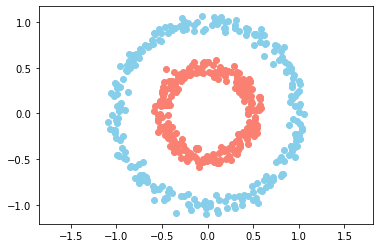

In [2]:
# CREAR EL DATASET

n = 500
p = 2

train_data, target_data = make_circles(n_samples=n, factor=0.5, noise=0.05)

target_data = target_data[:, np.newaxis]

plt.scatter(train_data[target_data[:, 0] == 0, 0], train_data[target_data[:, 0] == 0, 1], c='skyblue')
plt.scatter(train_data[target_data[:, 0] == 1, 0], train_data[target_data[:, 0] == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [3]:
# Clase de la capa de la red

class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)      * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

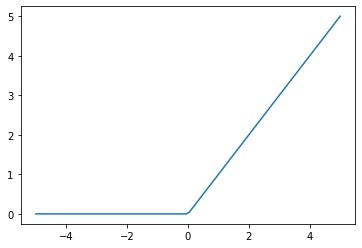

In [4]:
# Funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [5]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(p, 8, sigm)
# ...

topology = [p, 4, 8, 1]

def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l + 1], act_f))
    

    return nn

In [11]:
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    out = [(None, X)]
    
    # Forward pass
    
    for l, layer in enumerate(neural_net):
        
        z = out[-1][1]  @ neural_net[l].w + neural_net[l].b
        a = neural_net[1].act_f[0](z)
        
        out.append((z, a))
    
    if train:
        
        # Backward pass (training)
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l + 1][0]
            a = out[l + 1][1]
            
            if l == len(neural_net) - 1:
                # Calcular delta de la última capa.
                deltas.insert(0, l2_cost[1](a, target_data) * neural_net[l].act_f[1](a))
            else:
                # Calcular delta respecto a capa previa.
                deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
          
            _w = neural_net[l].w
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
    
    return out[-1][1]

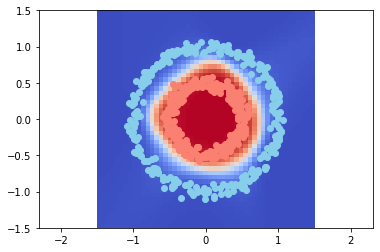

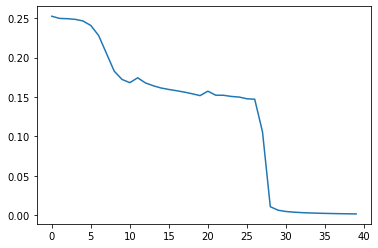

In [8]:
import time
from IPython.display import clear_output

neural_net = create_nn(topology, sigm)

loss = []

for i in range(1000):
    
    # Entrenamos la red!
    
    pY = train(neural_net, train_data, target_data, l2_cost, lr=0.05)
    
    if i % 25 == 0:
        
        loss.append(l2_cost[0](pY, target_data))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), target_data, l2_cost, train=False)[0][0]
               
        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')
        
        plt.scatter(train_data[target_data[:, 0] == 0, 0], train_data[target_data[:, 0] == 0, 1], c='skyblue')
        plt.scatter(train_data[target_data[:, 0] == 1, 0], train_data[target_data[:, 0] == 1, 1], c='salmon')
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)
        

In [10]:
print(_Y.shape)

(50, 50)
